In [2]:
!conda info


     active environment : pfg_env_1
    active env location : C:\Users\mvandenburg\Anaconda3\envs\pfg_env_1
            shell level : 1
       user config file : C:\Users\mvandenburg\.condarc
 populated config files : C:\Users\mvandenburg\.condarc
          conda version : 4.12.0
    conda-build version : 3.20.5
         python version : 3.8.5.final.0
       virtual packages : __win=0=0
                          __archspec=1=x86_64
       base environment : C:\Users\mvandenburg\Anaconda3  (writable)
      conda av data dir : C:\Users\mvandenburg\Anaconda3\etc\conda
  conda av metadata url : None
           channel URLs : https://conda.anaconda.org/pratyusht/win-64
                          https://conda.anaconda.org/pratyusht/noarch
                          https://conda.anaconda.org/microsoft/win-64
                          https://conda.anaconda.org/microsoft/noarch
                          https://conda.anaconda.org/conda-forge/win-64
                          https://conda.anac

In [3]:
map_df_Bos = gpd.read_file('C:/Users/mvandenburg/Documents/Python_Scripts/Streets/Boston_Street_Segments.geojson')

NameError: name 'gpd' is not defined

In [77]:
map_df_Bos.head()

OBJECTID  SEGMENT_ID L_F_ADD L_T_ADD R_F_ADD R_T_ADD PRE_DIR ST_NAME  \
0         1           1      12      22      13      29               A   
1         2           2      24      42      31      43               A   
2         3           3      44      64      45      67               A   
3         4           4      66      72      69      71               A   
4         5           5      74      90      73      87               A   

  ST_TYPE SUF_DIR  ... PLACE00_R TRACT00_L TRACT00_R  BLOCK00_L BLOCK00_R  \
0      ST          ...     07000     02127     02127                        
1      ST          ...     07000     02127     02127                        
2      ST          ...     07000     02127     02127                        
3      ST          ...     07000     02127     02127                        
4      ST          ...     07000     02127     02127                        

  MCD00_L MCD00_R STREET_ID    SHAPElen  \
0   07000   07000         2  166.673187   
1   07000   07000         2  162.142997   
2   07000   07000         2  178.522006   
3   07000   07000         2  196.841018   
4   07000   07000         2  179.277949   

                                            geometry  
0  LINESTRING (-71.05674 42.34078, -71.05633 42.3...  
1  LINESTRING (-71.05633 42.34112, -71.05594 42.3...  
2  LINESTRING (-71.05594 42.34146, -71.05550 42.3...  
3  LINESTRING (-71.05550 42.34183, -71.05502 42.3...  
4  LINESTRING (-71.05502 42.34224, -71.05458 42.3...  

[5 rows x 43 columns]

In [98]:
from PIL import Image

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import utm

# Import all roads for Boston, Chicago, Amsterdam, and Brussels
#map_df_Bos = gpd.read_file('././Boston_Street_Segments.geojson')
map_df_Bos = gpd.read_file('C:/Users/mvandenburg/Documents/Python_Scripts/Streets/Boston_Street_Segments.geojson')
map_df_Chi = gpd.read_file('C:/Users/mvandenburg/Documents/Python_Scripts/Streets/Chicago_Roads/geo_export_cbc3f5c9-332c-4d94-89bd-78e27cbcc9bb.shp')
map_df_Neth = gpd.read_file('C:/Users/mvandenburg/Documents/Python_Scripts/Streets/netherlands-roads-shape/roads.shp')
map_df_Bel = gpd.read_file('C:/Users/mvandenburg/Documents/Python_Scripts/Streets/belgium-roads-shape/roads.shp')


# Show data format
map_df_Bos.head()b

OBJECTID  SEGMENT_ID L_F_ADD L_T_ADD R_F_ADD R_T_ADD PRE_DIR ST_NAME  \
0         1           1      12      22      13      29               A   
1         2           2      24      42      31      43               A   
2         3           3      44      64      45      67               A   
3         4           4      66      72      69      71               A   
4         5           5      74      90      73      87               A   

  ST_TYPE SUF_DIR  ... PLACE00_R TRACT00_L TRACT00_R  BLOCK00_L BLOCK00_R  \
0      ST          ...     07000     02127     02127                        
1      ST          ...     07000     02127     02127                        
2      ST          ...     07000     02127     02127                        
3      ST          ...     07000     02127     02127                        
4      ST          ...     07000     02127     02127                        

  MCD00_L MCD00_R STREET_ID    SHAPElen  \
0   07000   07000         2  166.673187   
1   07000   07000         2  162.142997   
2   07000   07000         2  178.522006   
3   07000   07000         2  196.841018   
4   07000   07000         2  179.277949   

                                            geometry  
0  LINESTRING (-71.05674 42.34078, -71.05633 42.3...  
1  LINESTRING (-71.05633 42.34112, -71.05594 42.3...  
2  LINESTRING (-71.05594 42.34146, -71.05550 42.3...  
3  LINESTRING (-71.05550 42.34183, -71.05502 42.3...  
4  LINESTRING (-71.05502 42.34224, -71.05458 42.3...  

[5 rows x 43 columns]

In [3]:
map_df_Bos.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Old Method to convertlinestring coords to lat long

In [74]:
import utm
def utm_to_latlon(coords, zone_number, zone_letter):
    easting = coords[0]
    northing = coords[1]
    return utm.to_latlon(easting, northing, zone_number, zone_letter)

# Using nested list comprehension
map_df_Bos["lat_lon_tuple"] = [[utm_to_latlon(xy, 19, "T") for xy in tuple(geom.coords)] for geom in map_df_Bos.geometry]

print(map_df_Bos)

       OBJECTID  SEGMENT_ID L_F_ADD L_T_ADD R_F_ADD R_T_ADD PRE_DIR  \
0             1           1      12      22      13      29    None   
1             2           2      24      42      31      43    None   
2             3           3      44      64      45      67    None   
3             4           4      66      72      69      71    None   
4             5           5      74      90      73      87    None   
...         ...         ...     ...     ...     ...     ...     ...   
19273     19274        6336     362     390     361     389    None   
19274     19275       18776    1054    1086    1035    1085    None   
19275     19276       18781       2      58       1      57    None   
19276     19277        1342    1016    1052    1017    1033    None   
19277     19278       19157     152     300     153     299    None   

            ST_NAME ST_TYPE SUF_DIR  ... TRACT00_L TRACT00_R BLOCK00_L  \
0                 A      ST    None  ...     02127     02127      None   

In [65]:
latlon = {}
latlon['Amsterdam'] = [4.848849,4.946778,52.342185,52.404895]
latlon['Boston'] = [770000, 780000, 2.95e6, 2.96e6]
latlon['Chicago'] = [-87.686904,-87.568194,41.827512,41.916901]
latlon['Brussels'] = [4.325658,4.398702,50.806812,50.901174]


## Show Map of Boston

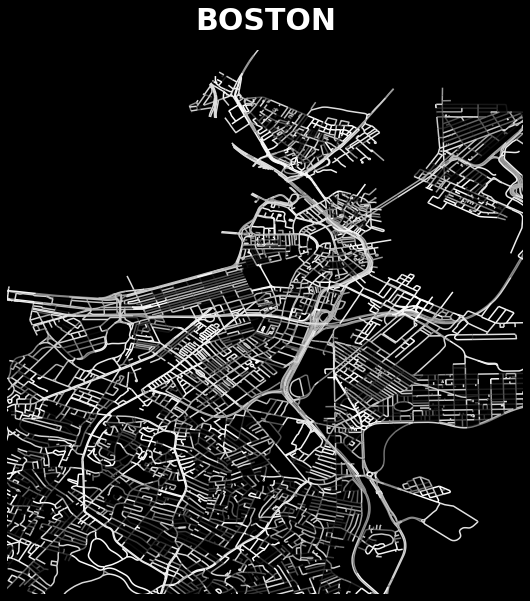

In [126]:
x_diff = 0.0850
y_diff = 0.0895

latlon = {}
latlon['Amsterdam'] = [4.848849,4.848849 + x_diff,52.342185,52.342185+ y_diff]
latlon['Boston'] = [-71.110941669,-71.110941669+ x_diff, 42.3020208202, 42.3020208202+ y_diff]
latlon['Chicago'] = [-87.686904,-87.686904+ x_diff,41.827512,41.827512+ y_diff]
latlon['Brussels'] = [4.325658,4.325658+ x_diff,50.806812,50.806812+ y_diff]


# Set image properties
fig, ax = plt.subplots(1, figsize=(10,10))
map_df_Bos.plot(cmap='Greys_r', ax=ax)
plt.style.use('dark_background')
ax.axis('off')

# Set coordinates to match Boston, change for your own city
#ax.set_xlim(42.3675288)
#ax.set_ylim(-71.0940009)
#-71.110941669,42.3260808202,-71.0129802293,42.3849411163

#-71.073956,42.351564,-71.049358,42.370806


#-71.110941669,-71.0129802293, 42.3260808202, 42.3849411163
ax.set_xlim(latlon[city[0]][0], latlon[city[0]][1])
ax.set_ylim(latlon[city[0]][2], latlon[city[0]][3])
ax.set_aspect('equal')
ax.set_title("BOSTON", fontdict={'fontsize': 30, 'fontweight': 'heavy'}, pad=20)

# Plot the street map of Boston
#plt.show()

fig.savefig('bOSTON_BW.png') 

## Show Map of Brussels

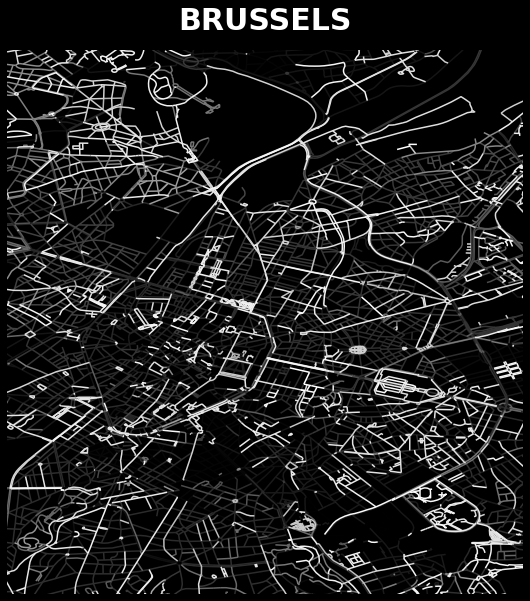

In [125]:
# Set image properties


latlon = {}
latlon['Amsterdam'] = [4.848849,4.848849 + x_diff,52.342185,52.342185+ y_diff]
latlon['Boston'] = [-71.110941669,-71.110941669+ x_diff, 42.3020208202, 42.3020208202+ y_diff]
latlon['Chicago'] = [-87.686904,-87.686904+ x_diff,41.827512,41.827512+ y_diff]
latlon['Brussels'] = [4.325658,4.325658+ x_diff,50.806812,50.806812+ y_diff]



fig, ax = plt.subplots(1, figsize=(10,10))
map_df_Bel.plot(cmap='Greys_r', ax=ax)
plt.style.use('dark_background')
ax.axis('off')

# Set coordinates to match Boston, change for your own city
#ax.set_xlim(42.3675288)
#ax.set_ylim(-71.0940009)
#-71.110941669,42.3260808202,-71.0129802293,42.3849411163

#-71.073956,42.351564,-71.049358,42.370806
ax.set_xlim(latlon[city[3]][0], latlon[city[3]][1])
ax.set_ylim(latlon[city[3]][2], latlon[city[3]][3])
ax.set_aspect('equal')
ax.set_title("BRUSSELS",fontdict={'fontsize': 30, 'fontweight': 'heavy'}, pad=20)

# Plot the street map of Brussels
plt.show()

fig.savefig('Brussels_BW.png')   # save the figure to file


## Show a map of Amsterdam

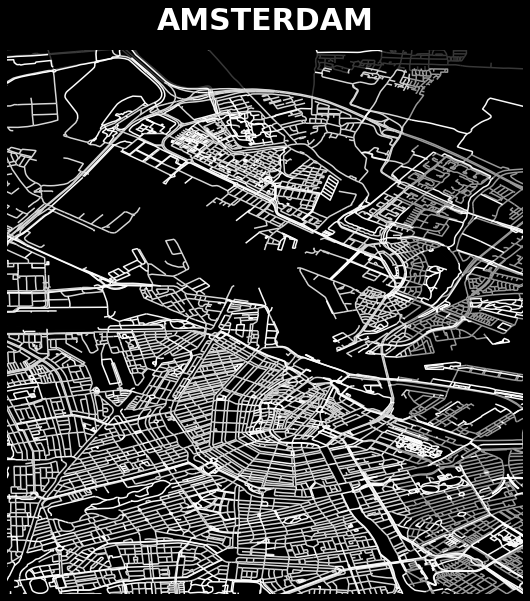

In [123]:
# Set image properties
fig, ax = plt.subplots(1, figsize=(10,10))
map_df_Neth.plot(cmap='Greys_r', ax=ax)
plt.style.use('dark_background')
ax.axis('off')

# Set coordinates to match Boston, change for your own city
#ax.set_xlim(42.3675288)
#ax.set_ylim(-71.0940009)
#-71.110941669,42.3260808202,-71.0129802293,42.3849411163

#-71.073956,42.351564,-71.049358,42.370806
ax.set_xlim(latlon[city[2]][0], latlon[city[2]][1])
ax.set_ylim(latlon[city[2]][2], latlon[city[2]][3])
ax.set_aspect('equal')
ax.set_title("AMSTERDAM", fontdict={'fontsize': 30, 'fontweight': 'heavy'}, pad=20)

# Plot the street map of Amsterdam
plt.show()

fig.savefig('Amseterdam_BW.png') 

## Show map of Chicago

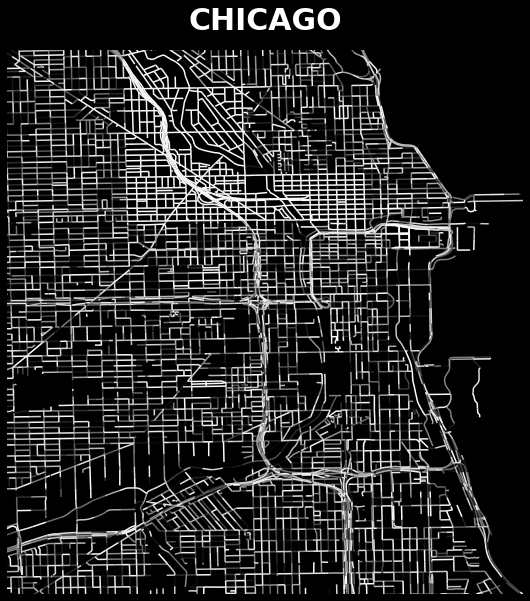

In [127]:
# Set image properties
fig, ax = plt.subplots(1, figsize=(10,10))
map_df_Chi.plot(cmap='Greys_r', ax=ax)
plt.style.use('dark_background')
ax.axis('off')

# Set coordinates to match Boston, change for your own city
#ax.set_xlim(42.3675288)
#ax.set_ylim(-71.0940009)
#-71.110941669,42.3260808202,-71.0129802293,42.3849411163

#-71.073956,42.351564,-71.049358,42.370806
ax.set_xlim(latlon[city[1]][0], latlon[city[1]][1])
ax.set_ylim(latlon[city[1]][2], latlon[city[1]][3])
ax.set_aspect('equal')
ax.set_title("CHICAGO",fontdict={'fontsize': 30, 'fontweight': 'heavy'}, pad=20)

# Plot the street map of Chicago
plt.show()


fig.savefig('Chicago_BW.png')   # save the figure to file


## MultiPlot

(52.3345, 52.384)

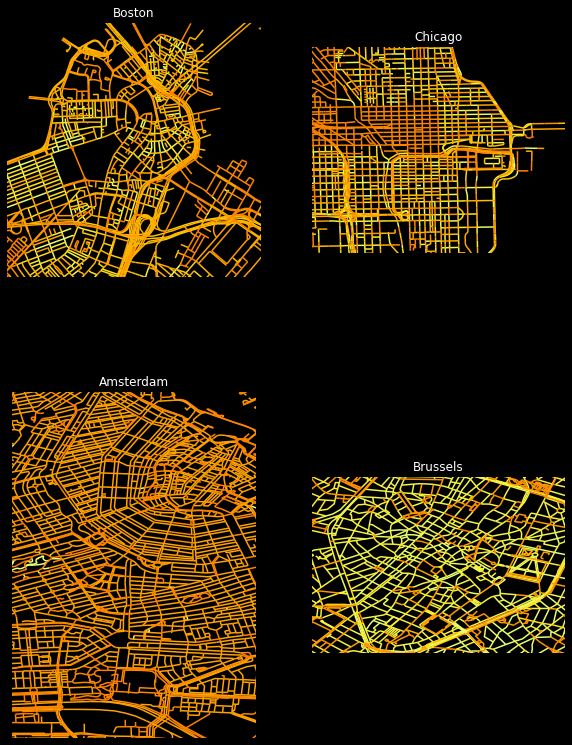

In [25]:
#List of all imported dataframes for streets
#map_df_Bos
#map_df_Chi
#map_df_Neth
#map_df_Bel

fig, axs = plt.subplots(2, 2, figsize=(10,14))
map_df_Bos.plot(cmap='Greys_r', ax=axs[0, 0])
map_df_Chi.plot(cmap='Greys_r', ax=axs[0, 1])
map_df_Neth.plot(cmap='Greys_r', ax=axs[1, 0])
map_df_Bel.plot(cmap='Greys_r', ax=axs[1, 1])

latlon = {}
latlon['Amsterdam'] = [4.848849,4.946778,52.342185,52.404895]
latlon['Boston'] = [-71.110941669,-71.0129802293, 42.3260808202, 42.3849411163]
latlon['Chicago'] = [-87.686904,-87.568194,41.827512,41.916901]
latlon['Brussels'] = [4.325658,4.398702,50.806812,50.901174]


x_diff = 0.0350
y_diff = 0.0495


plt.style.use('dark_background')

city = ['Boston','Chicago','Amsterdam', 'Brussels']

axs[0, 0].axis('off')
axs[0, 0].set_aspect('equal')
axs[0, 0].set_title('BOSTON',fontdict={'fontsize': 30, 'fontweight': 'heavy'}, pad=20)
#axs[0, 0].set_xlim(770000,780000)
#axs[0, 0].set_ylim(2.95e6, 2.96e6)
axs[0, 0].set_xlim(latlon[city[0]][0], latlon[city[0]][1])
axs[0, 0].set_ylim(latlon[city[0]][2], latlon[city[0]][3])


axs[0, 1].axis('off')
axs[0, 1].set_aspect('equal')
#axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title("CHICAGO",fontdict={'fontsize': 30, 'fontweight': 'heavy'}, pad=20)
axs[0, 1].set_xlim(latlon[city[1]][0], latlon[city[1]][1])
axs[0, 1].set_ylim(latlon[city[1]][2], latlon[city[1]][3])


axs[1, 1].axis('off')
axs[1, 1].set_aspect('equal')
#axs[1, 1].plot(x, -y, 'tab:green')
axs[1, 1].set_title('BRUSSELS',fontdict={'fontsize': 30, 'fontweight': 'heavy'}, pad=20)
axs[1, 1].set_xlim(latlon[city[3]][0], latlon[city[3]][1])
axs[1, 1].set_ylim(latlon[city[3]][2], latlon[city[3]][3])

axs[1, 0].axis('off')
#axs[1, 0].plot(x, -y, 'tab:red')
axs[1, 0].set_title('AMSTERDAM',fontdict={'fontsize': 30, 'fontweight': 'heavy'}, pad=20)
axs[1, 0].set_xlim(latlon[city[2]][0], latlon[city[2]][1])
axs[1, 0].set_ylim(latlon[city[2]][2], latlon[city[2]][3])
axs[1, 0].set_aspect('equal')


#for ax in axs.flat:
#    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

plt.show()


## Take Two

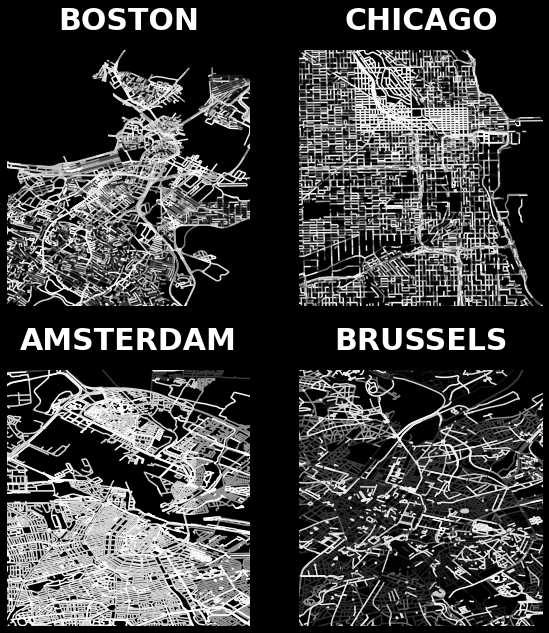

In [152]:
#List of all imported dataframes for streets
#map_df_Bos
#map_df_Chi
#map_df_Neth
#map_df_Bel

fig, axs = plt.subplots(2, 2, figsize=(10,10))
map_df_Bos.plot(cmap='Greys_r', ax=axs[0, 0])
map_df_Chi.plot(cmap='Greys_r', ax=axs[0, 1])
map_df_Neth.plot(cmap='Greys_r', ax=axs[1, 0])
map_df_Bel.plot(cmap='Greys_r', ax=axs[1, 1])



x_diff = 0.0850
y_diff = 0.0895

latlon = {}
latlon['Amsterdam'] = [4.848849,4.848849 + x_diff,52.342185,52.342185+ y_diff]
latlon['Boston'] = [-71.110941669,-71.110941669+ x_diff, 42.3020208202, 42.3020208202+ y_diff]
latlon['Chicago'] = [-87.686904,-87.686904+ x_diff,41.827512,41.827512+ y_diff]
latlon['Brussels'] = [4.325658,4.325658+ x_diff,50.806812,50.806812+ y_diff]


plt.style.use('dark_background')

city = ['Boston','Chicago','Amsterdam', 'Brussels']

axs[0, 0].axis('off')
axs[0, 0].set_title('BOSTON',fontdict={'fontsize': 30, 'fontweight': 'heavy'}, pad=20)
#axs[0, 0].set_xlim(770000,780000)
#axs[0, 0].set_ylim(2.95e6, 2.96e6)
axs[0, 0].set_xlim(latlon[city[0]][0], latlon[city[0]][1])
axs[0, 0].set_ylim(latlon[city[0]][2], latlon[city[0]][3])
axs[0, 0].set_aspect('equal')


axs[0, 1].axis('off')
axs[0, 1].set_title("CHICAGO",fontdict={'fontsize': 30, 'fontweight': 'heavy'}, pad=20)
axs[0, 1].set_xlim(latlon[city[1]][0], latlon[city[1]][1])
axs[0, 1].set_ylim(latlon[city[1]][2], latlon[city[1]][3])
axs[0, 1].set_aspect('equal')


axs[1, 1].axis('off')
axs[1, 1].set_title('BRUSSELS',fontdict={'fontsize': 30, 'fontweight': 'heavy'}, pad=20)
axs[1, 1].set_xlim(latlon[city[3]][0], latlon[city[3]][1])
axs[1, 1].set_ylim(latlon[city[3]][2], latlon[city[3]][3])
axs[1, 1].set_aspect('equal')

axs[1, 0].axis('off')
axs[1, 0].set_title('AMSTERDAM',fontdict={'fontsize': 30, 'fontweight': 'heavy'}, pad=20)
axs[1, 0].set_xlim(latlon[city[2]][0], latlon[city[2]][1])
axs[1, 0].set_ylim(latlon[city[2]][2], latlon[city[2]][3])
axs[1, 0].set_aspect('equal')


#for ax in axs.flat:
#    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()


plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.25)



def savePlots(self):
    i = 0
    for fig in self.figures:
        fig.savefig('plots/myPlot'+str(i)+'.png')
        i += 1

#plt.subplot_tool()
plt.show()
fig.savefig('ALLPLOTS_5_w_1_h_25.png')   # save the figure to file


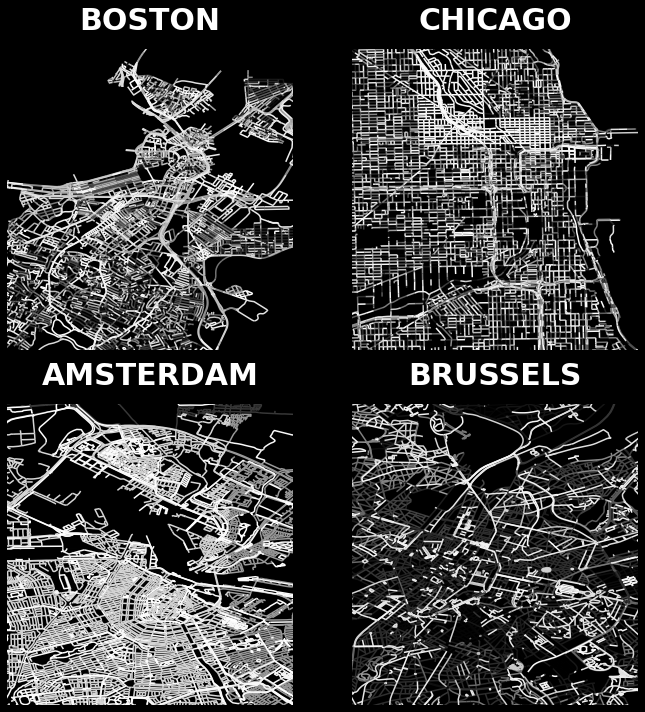

In [150]:
axs[0, 0].axis('off')
axs[0, 0].set_title('BOSTON',fontdict={'fontsize': 30, 'fontweight': 'heavy'}, pad=20)
#axs[0, 0].set_xlim(770000,780000)
#axs[0, 0].set_ylim(2.95e6, 2.96e6)
axs[0, 0].set_xlim(latlon[city[0]][0], latlon[city[0]][1])
axs[0, 0].set_ylim(latlon[city[0]][2], latlon[city[0]][3])
axs[0, 0].set_aspect('equal')


axs[0, 1].axis('off')
axs[0, 1].set_title("CHICAGO",fontdict={'fontsize': 30, 'fontweight': 'heavy'}, pad=20)
axs[0, 1].set_xlim(latlon[city[1]][0], latlon[city[1]][1])
axs[0, 1].set_ylim(latlon[city[1]][2], latlon[city[1]][3])
axs[0, 1].set_aspect('equal')


axs[1, 1].axis('off')
axs[1, 1].set_title('BRUSSELS',fontdict={'fontsize': 30, 'fontweight': 'heavy'}, pad=20)
axs[1, 1].set_xlim(latlon[city[3]][0], latlon[city[3]][1])
axs[1, 1].set_ylim(latlon[city[3]][2], latlon[city[3]][3])
axs[1, 1].set_aspect('equal')

axs[1, 0].axis('off')
axs[1, 0].set_title('AMSTERDAM',fontdict={'fontsize': 30, 'fontweight': 'heavy'}, pad=20)
axs[1, 0].set_xlim(latlon[city[2]][0], latlon[city[2]][1])
axs[1, 0].set_ylim(latlon[city[2]][2], latlon[city[2]][3])
axs[1, 0].set_aspect('equal')

fig           
#plt.show()

In [145]:
axs[0, 0].axis('off')
axs[0, 0].set_title('BOSTON',fontdict={'fontsize': 30, 'fontweight': 'heavy'}, pad=20)
#axs[0, 0].set_xlim(770000,780000)
#axs[0, 0].set_ylim(2.95e6, 2.96e6)
axs[0, 0].set_xlim(latlon[city[0]][0], latlon[city[0]][1])
axs[0, 0].set_ylim(latlon[city[0]][2], latlon[city[0]][3])
axs[0, 0].set_aspect('equal')


axs[0, 1].axis('off')
axs[0, 1].set_title("CHICAGO",fontdict={'fontsize': 30, 'fontweight': 'heavy'}, pad=20)
axs[0, 1].set_xlim(latlon[city[1]][0], latlon[city[1]][1])
axs[0, 1].set_ylim(latlon[city[1]][2], latlon[city[1]][3])
axs[0, 1].set_aspect('equal')


axs[1, 1].axis('off')
axs[1, 1].set_title('BRUSSELS',fontdict={'fontsize': 30, 'fontweight': 'heavy'}, pad=20)
axs[1, 1].set_xlim(latlon[city[3]][0], latlon[city[3]][1])
axs[1, 1].set_ylim(latlon[city[3]][2], latlon[city[3]][3])
axs[1, 1].set_aspect('equal')

axs[1, 0].axis('off')
axs[1, 0].set_title('AMSTERDAM',fontdict={'fontsize': 30, 'fontweight': 'heavy'}, pad=20)
axs[1, 0].set_xlim(latlon[city[2]][0], latlon[city[2]][1])
axs[1, 0].set_ylim(latlon[city[2]][2], latlon[city[2]][3])
axs[1, 0].set_aspect('equal')


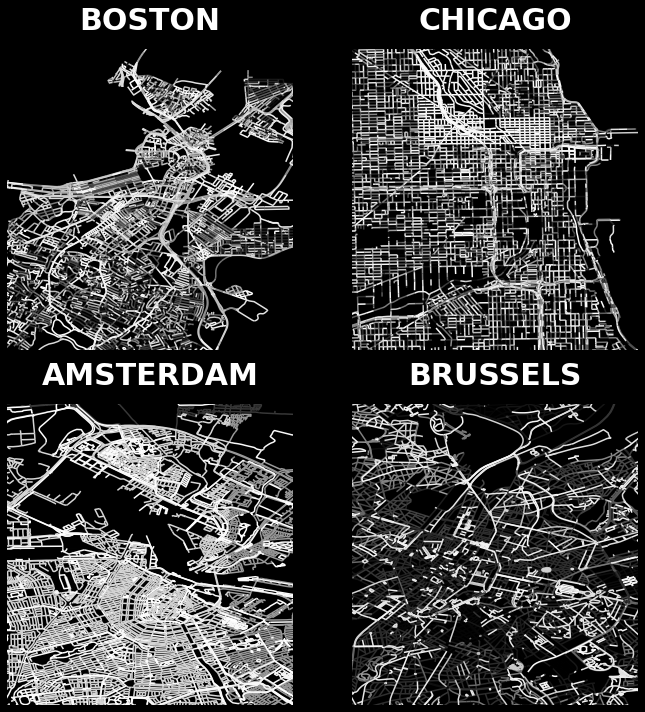

In [147]:
fig

In [15]:
latlon

print(latlon[city[0]][0], latlon[city[0]][1])

770000 780000


In [13]:
city

['Boston', 'Chicago', 'Amsterdam', 'Brussels']

# Load in the Saved Figures

In [132]:
from PIL import Image

# Load created images; for example 4
amsterdam = Image.open('Amsterdam_BW.png')
boston = Image.open('bOSTON_BW.png')
brussels = Image.open('Brussels_BW.png')
chicago = Image.open('Chicago_BW.png')

# Retrieve width and height original images
width = amsterdam.size[0]
height = amsterdam.size[1]

# Create new image, twice as large in both dimensions
new_im = Image.new('RGB', (width*2,height*2))

# Paste images in new image
new_im.paste(amsterdam, (0,0))
new_im.paste(boston, (width,0))
new_im.paste(brussels, (0,height))
new_im.paste(chicago, (width,height))

# Show the new image of a grid of cities
new_im.save('city_grid.jpg', 'jpeg', quality=95)
new_im.show()

# Make it Interactive

In [16]:
#Initialize a new map
import folium
BosMap = folium.Map(location=[42.3260808202,-71.110941669], tiles='Stamen Toner', zoom_start=16, attr ='<a href="https://www.openstreetmap.org/">OpenStreetMap</a> contributors, <a href="https://public.carto.com/viz/397fd294-a82b-4470-90cc-6153ebad5bf6/embed_map">Positron by Carto</a> | Data from <a href = "https://github.com/ritvikmath/StarbucksStoreScraping">Ritvik Kharkar</a>')

LocateControl().add_to(BosMap)
folium.GeoJson(data=map_df_Bos["geometry"]).add_to(BosMap)

BosMap


#for index, franchise in franchises.iterrows():
#    location = [franchise['latitude'], franchise['longitude']]
 #   folium.Marker(location, popup = f'Name:{franchise["store"]}\n Revenue($):{franchise["revenue"]}').add_to(map_kenya)


AttributeError: module 'folium' has no attribute 'LocateControl'

In [ ]:
# Create the choropleth map. Key components have explanatory comments.
folium.Choropleth(
    geo_data = 'laZips.geojson',         # the geojson which you want to draw on the map [in our case it is the zipcodes in LA County]
    name='choropleth',
    data= numstoresByZip,                # the pandas dataframe which contains the zipcode information and the values of the variable you want to plot on the choropleth
    columns=['zipcode', 'numStores'],    # the columns from the dataframe that you want to use
    nan_fill_color='grey',               # fill color for null values
    nan_fill_opacity=0.4,                # opacity for null values
    key_on='feature.properties.zipcode', # the common key between one of your columns and an attribute in the geojson. This is how python knows which dataframe row matches up to which zipcode in the geojson
    fill_color='YlOrRd',                 # Try some other colors: 'YlGn', 'OrRd', 'BuGn' 'BuPu', 'GnBu', 'PuBu', 'PuBuGn', 'PuRd', 'RdPu', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd'.
    fill_opacity = 0.7,                  # fill color for data values
    line_opacity = 0.2,                  # opacity for data values
    legend_name = 'Number of Starbucks'
).add_to(laMap)

folium.LayerControl().add_to(laMap)

# Display your map
laMap

# Create Images

In [ ]:
#Create new image, twice as large in both dimensions
new_im = Image.new('RGB', (width*2,height*2))

# Paste images in new image
new_im.paste(amsterdam, (0,0))
new_im.paste(hague, (width,0))
new_im.paste(rotterdam, (0,height))
new_im.paste(utrecht, (width,height))

# Show the new image of a grid of cities
new_im.show()